In [1]:
import pandas as pd
import glob
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
# from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
from sklearn.svm import SVR
# from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


path = '/Users/lucaswin/COGS118A/Group043-Wi23/Data/'

files = glob.glob(path + "/*.csv")

data_frames = []

for file in files:
    df = pd.read_csv(file)
    data_frames.append(df)
    
combined_df = pd.concat(data_frames, ignore_index=True)

In [2]:
clean_df = combined_df.dropna()
clean_df.head()

# unique_count = clean_df['genre'].nunique()
# unique_count #495 combinations in dataset

,movie_id,movie_name,year,certificate,runtime,genre,rating,description,director,director_id,star,star_id,votes,gross(in $)
6,tt0068646,The Godfather,1972,R,175 min,"Crime, Drama",9.2,The aging patriarch of an organized crime dyna...,Francis Ford Coppola,/name/nm0000338/,"Marlon Brando, \nAl Pacino, \nJames Caan, \nDi...","/name/nm0000008/,/name/nm0000199/,/name/nm0001...",1875646.0,134966411.0
7,tt8946378,Knives Out,2019,PG-13,130 min,"Comedy, Crime, Drama",7.9,A detective investigates the death of the patr...,Rian Johnson,/name/nm0426059/,"Daniel Craig, \nChris Evans, \nAna de Armas, \...","/name/nm0185819/,/name/nm0262635/,/name/nm1869...",705622.0,165359751.0
9,tt0993846,The Wolf of Wall Street,2013,R,180 min,"Biography, Comedy, Crime",8.2,"Based on the true story of Jordan Belfort, fro...",Martin Scorsese,/name/nm0000217/,"Leonardo DiCaprio, \nJonah Hill, \nMargot Robb...","/name/nm0000138/,/name/nm1706767/,/name/nm3053...",1430476.0,116900694.0
11,tt0110912,Pulp Fiction,1994,R,154 min,"Crime, Drama",8.9,"The lives of two mob hitmen, a boxer, a gangst...",Quentin Tarantino,/name/nm0000233/,"John Travolta, \nUma Thurman, \nSamuel L. Jack...","/name/nm0000237/,/name/nm0000235/,/name/nm0000...",2074027.0,107928762.0
13,tt0468569,The Dark Knight,2008,PG-13,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,Christopher Nolan,/name/nm0634240/,"Christian Bale, \nHeath Ledger, \nAaron Eckhar...","/name/nm0000288/,/name/nm0005132/,/name/nm0001...",2675531.0,534858444.0


In [3]:
new_df = clean_df.loc[:, ['year', 'certificate', 'runtime', 'genre', 'rating', 'votes', 'gross(in $)']]

def convert_runtime(string):
    runtime = float(string.split(' ')[0])
    return runtime

new_df['runtime'] = new_df['runtime'].apply(convert_runtime)
new_df.head()

,year,certificate,runtime,genre,rating,votes,gross(in $)
6,1972,R,175.0,"Crime, Drama",9.2,1875646.0,134966411.0
7,2019,PG-13,130.0,"Comedy, Crime, Drama",7.9,705622.0,165359751.0
9,2013,R,180.0,"Biography, Comedy, Crime",8.2,1430476.0,116900694.0
11,1994,R,154.0,"Crime, Drama",8.9,2074027.0,107928762.0
13,2008,PG-13,152.0,"Action, Crime, Drama",9.0,2675531.0,534858444.0


In [4]:
genre = new_df['genre'].str.get_dummies(sep=', ')
new_df = pd.concat([new_df, genre], axis=1)

new_df.head()
# new_df.shape (18709, 28)

,year,certificate,runtime,genre,rating,votes,gross(in $),Action,Adventure,Animation,...,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western
6,1972,R,175.0,"Crime, Drama",9.2,1875646.0,134966411.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,2019,PG-13,130.0,"Comedy, Crime, Drama",7.9,705622.0,165359751.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,2013,R,180.0,"Biography, Comedy, Crime",8.2,1430476.0,116900694.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11,1994,R,154.0,"Crime, Drama",8.9,2074027.0,107928762.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13,2008,PG-13,152.0,"Action, Crime, Drama",9.0,2675531.0,534858444.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


Earliest Year: 1913
Latest Year: 2022


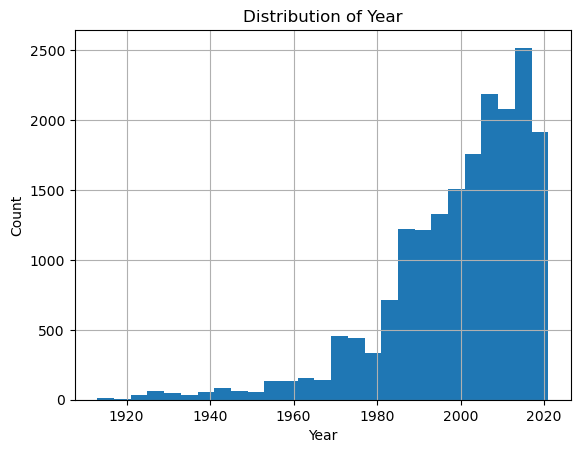

In [5]:
new_df['year'] = new_df['year'].astype(int)

print('Earliest Year:', new_df['year'].min())
print('Latest Year:', new_df['year'].max())

new_df['year'].hist(bins=range(1913, 2022, 4))
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Distribution of Year')
plt.show()

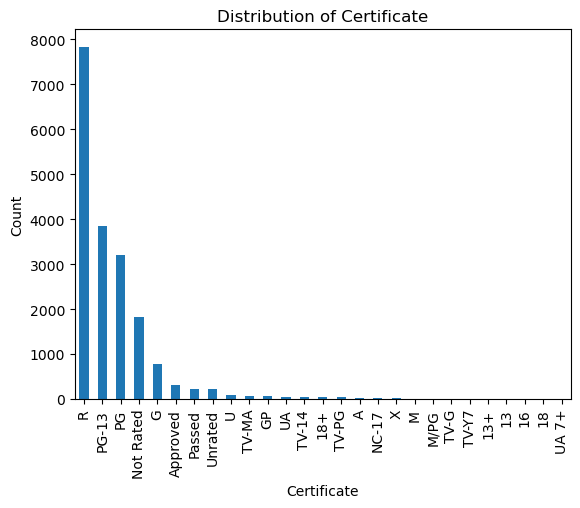

In [6]:
certificate_counts = new_df['certificate'].value_counts()
certificate_counts.plot.bar()
plt.title('Distribution of Certificate')
plt.xlabel('Certificate')
plt.ylabel('Count')
plt.show()

Shortest Movie Runtime: 40.0 min
Longest Movie Runtime: 776.0 min
Average Movie Runtime: 106.4678496980063 min


Text(0, 0.5, 'Runtime')

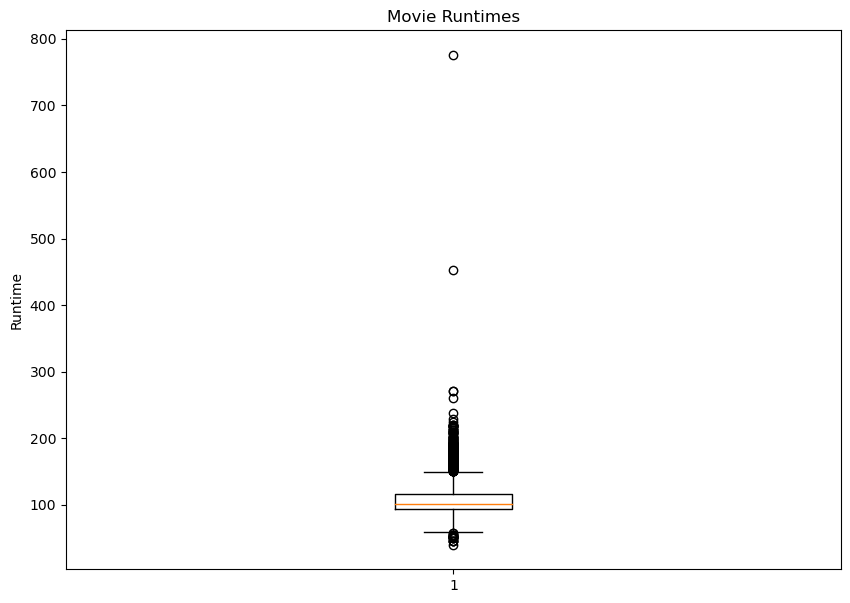

In [7]:
print('Shortest Movie Runtime:', new_df['runtime'].min(), 'min')
print('Longest Movie Runtime:', new_df['runtime'].max(), 'min')
print('Average Movie Runtime:', new_df['runtime'].mean(), 'min')
#Potential 2 Outliers (450min and 776min)

# new_df['runtime'].hist(bins=range(0, 800, 30))
# plt.xlabel('Minutes')
# plt.ylabel('Count')
# plt.title('Distribution of Runtime')
# plt.show()

fig = plt.figure(figsize =(10, 7))
ax = fig.add_subplot(111)
plt.boxplot(new_df['runtime'])
ax.set_title('Movie Runtimes')
ax.set_ylabel('Runtime')

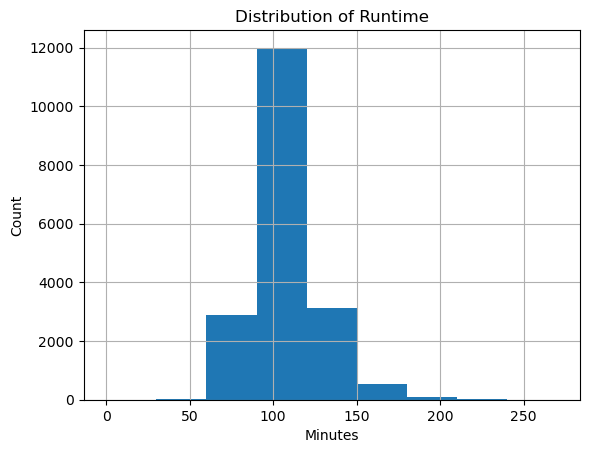

In [8]:
new_df = new_df[new_df['runtime'] < 300]
# new_df.shape
new_df['runtime'].hist(bins=range(0, 300, 30))
plt.xlabel('Minutes')
plt.ylabel('Count')
plt.title('Distribution of Runtime')
plt.show()

Text(0, 0.5, 'Runtime')

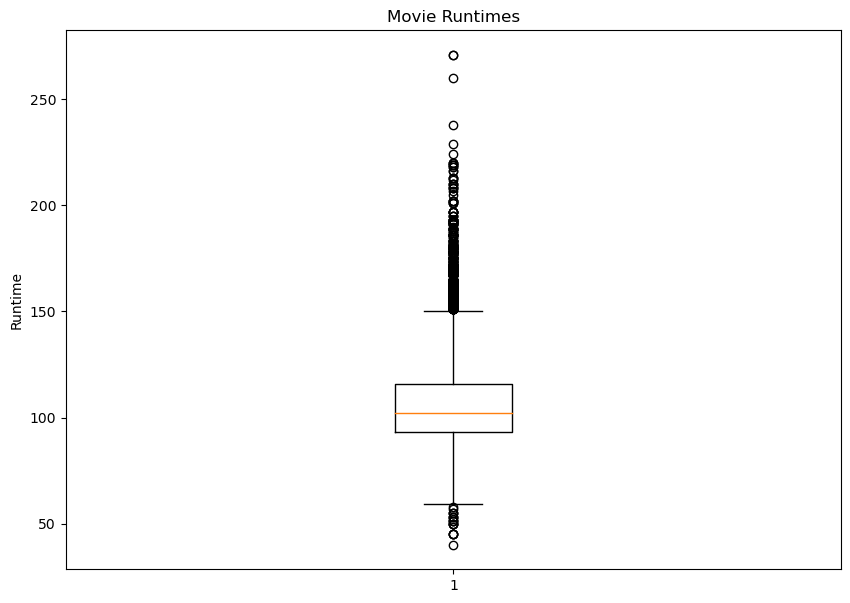

In [9]:
fig = plt.figure(figsize =(10, 7))
ax = fig.add_subplot(111)
plt.boxplot(new_df['runtime'])
ax.set_title('Movie Runtimes')
ax.set_ylabel('Runtime')

Text(0, 0.5, 'Rating')

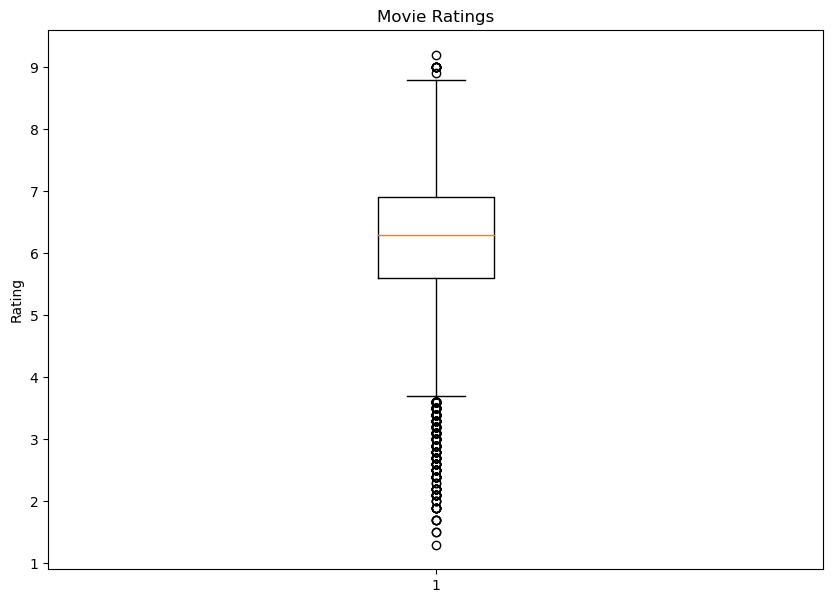

In [10]:
fig = plt.figure(figsize =(10, 7))
ax = fig.add_subplot(111)
plt.boxplot(new_df['rating'])
ax.set_title('Movie Ratings')
ax.set_ylabel('Rating')

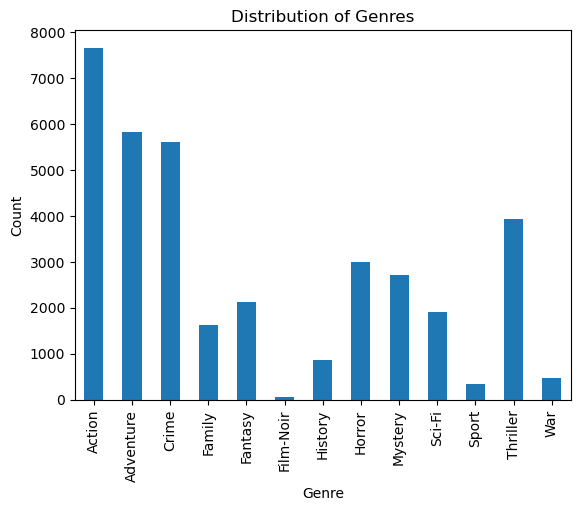

In [11]:
genre_counts = new_df.loc[:, ['Action', 'Adventure', 'Crime', 'Family', 'Fantasy', 'Film-Noir',
                              'History', 'Horror', 'Mystery', 'Sci-Fi', 'Sport', 'Thriller', 'War']].sum()
genre_counts.plot(kind='bar')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.title('Distribution of Genres')
plt.show()


<font size="8">Using 'Year' as Numerical</font>


In [12]:
X_train, X_test, y_train, y_test = train_test_split(new_df[['year', 'certificate', 'runtime', 'rating', 'votes',
                                                            'Action', 'Adventure', 'Crime', 'Family', 'Fantasy', 'Film-Noir',
                                                            'History', 'Horror', 'Mystery', 'Sci-Fi', 'Sport', 'Thriller', 'War']]
                                                    , new_df['gross(in $)'], test_size=0.2, random_state=42)

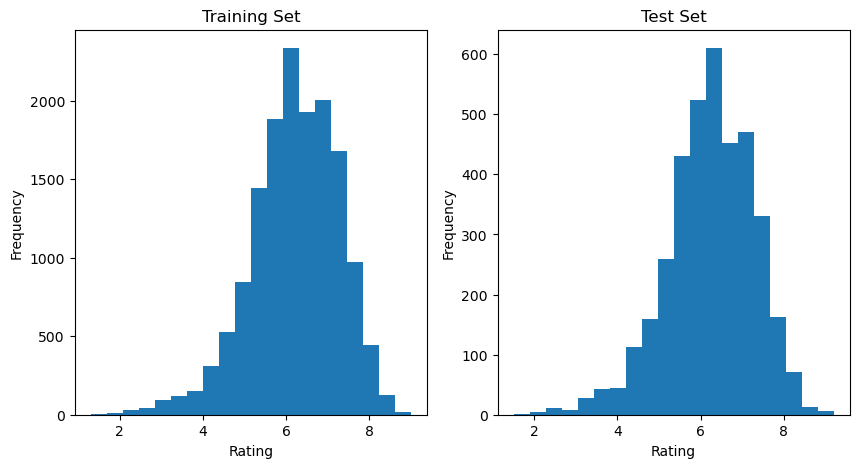

In [13]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
ax[0].hist(X_train['rating'], bins=20)
ax[0].set_title('Training Set')
ax[0].set_xlabel('Rating')
ax[0].set_ylabel('Frequency')
ax[1].hist(X_test['rating'], bins=20)
ax[1].set_title('Test Set')
ax[1].set_xlabel('Rating')
ax[1].set_ylabel('Frequency')
plt.show()

In [14]:
num_scaler = StandardScaler()
ohe_encoder = OneHotEncoder()

In [15]:
X_train_num = X_train[['year', 'runtime', 'rating', 'votes',
                      'Action', 'Adventure', 'Crime', 'Family', 'Fantasy', 'Film-Noir',
                       'History', 'Horror', 'Mystery', 'Sci-Fi', 'Sport', 'Thriller', 'War']]
X_train_cat = X_train[['certificate']]

X_train_num_scaled = num_scaler.fit_transform(X_train_num)
X_train_cat_encoded = ohe_encoder.fit_transform(X_train_cat)

In [16]:
X_train_preprocessed = pd.concat([
    pd.DataFrame(X_train_num_scaled, columns=['year', 'runtime', 'rating', 'votes',
                                             'Action', 'Adventure', 'Crime', 'Family', 'Fantasy', 'Film-Noir', 
                                              'History', 'Horror', 'Mystery', 'Sci-Fi', 'Sport', 'Thriller', 'War']),
    pd.DataFrame(X_train_cat_encoded.toarray(), columns=ohe_encoder.get_feature_names(['certificate']))
], axis=1)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [17]:
X_test_num = X_test[['year', 'runtime', 'rating', 'votes', 
                     'Action', 'Adventure', 'Crime', 'Family', 'Fantasy', 'Film-Noir',
                     'History', 'Horror', 'Mystery', 'Sci-Fi', 'Sport', 'Thriller', 'War']]
X_test_cat = X_test[['certificate']]

X_test_num_scaled = num_scaler.transform(X_test_num)
X_test_cat_encoded = ohe_encoder.transform(X_test_cat)

In [18]:
X_test_preprocessed = pd.concat([
    pd.DataFrame(X_test_num_scaled, columns=['year', 'runtime', 'rating', 'votes', 
                                             'Action', 'Adventure', 'Crime', 'Family', 'Fantasy', 
                                             'Film-Noir', 'History', 'Horror', 'Mystery', 'Sci-Fi', 'Sport', 'Thriller', 'War']),
    pd.DataFrame(X_test_cat_encoded.toarray(), columns=ohe_encoder.get_feature_names(['certificate']))
], axis=1)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


<font size="5">Linear Regression</font>

In [19]:
model = LinearRegression()
model.fit(X_train_preprocessed, y_train)
y_pred = model.predict(pd.concat([pd.DataFrame(X_test_num_scaled, columns=['year', 'runtime', 'rating', 'votes', 'Action', 'Adventure', 'Crime', 'Family', 'Fantasy', 'Film-Noir', 'History', 'Horror', 'Mystery', 'Sci-Fi', 'Sport', 'Thriller', 'War']), 
                                  pd.DataFrame(X_test_cat_encoded.toarray(), columns=ohe_encoder.get_feature_names(['certificate']))], axis=1))

print('R2 score:', r2_score(y_test, y_pred))
print('Mean squared error:', mean_squared_error(y_test, y_pred))
print('Mean absolute error:', mean_absolute_error(y_test, y_pred))

R2 score: 0.5095056704610195
Mean squared error: 2108651789424701.2
Mean absolute error: 24997123.054899964


/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


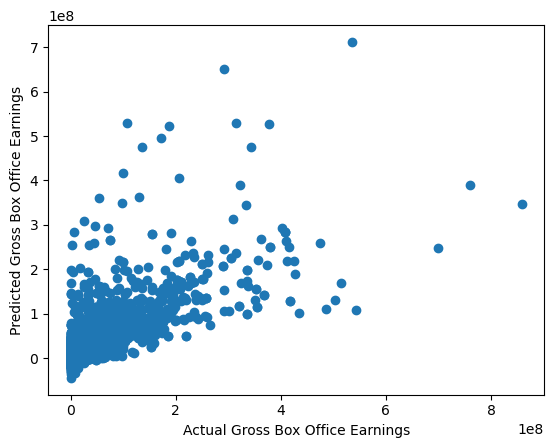

In [20]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Gross Box Office Earnings")
plt.ylabel("Predicted Gross Box Office Earnings")
plt.show()

<font size="5">Decision Tree</font>

In [21]:
model = DecisionTreeRegressor()
model.fit(X_train_preprocessed, y_train)
y_pred = model.predict(X_test_preprocessed)

print('R2 score:', r2_score(y_test, y_pred))
print('Mean squared error:', mean_squared_error(y_test, y_pred))
print('Mean absolute error:', mean_absolute_error(y_test, y_pred))

R2 score: 0.9445380504180613
Mean squared error: 238432805820323.8
Mean absolute error: 3392168.4575093533


<font size="8">Using Year as Categorical (5-year increment)</font>

In [22]:
new_df['year_category'] = (((new_df['year'] - 1910) // 5) * 5 + 1910) // 10 * 10
new_df['year_category'] = new_df['year_category'].apply(lambda x: str(x) + '-' + str(x+4) if (x+3) < 2023 else str(x) + '-2022')
new_df

,year,certificate,runtime,genre,rating,votes,gross(in $),Action,Adventure,Animation,...,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western,year_category
6,1972,R,175.0,"Crime, Drama",9.2,1875646.0,134966411.0,0,0,0,...,0,0,0,0,0,0,0,0,0,1970-1974
7,2019,PG-13,130.0,"Comedy, Crime, Drama",7.9,705622.0,165359751.0,0,0,0,...,0,0,0,0,0,0,0,0,0,2010-2014
9,2013,R,180.0,"Biography, Comedy, Crime",8.2,1430476.0,116900694.0,0,0,0,...,0,0,0,0,0,0,0,0,0,2010-2014
11,1994,R,154.0,"Crime, Drama",8.9,2074027.0,107928762.0,0,0,0,...,0,0,0,0,0,0,0,0,0,1990-1994
13,2008,PG-13,152.0,"Action, Crime, Drama",9.0,2675531.0,534858444.0,1,0,0,...,0,0,0,0,0,0,0,0,0,2000-2004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
281616,2010,Not Rated,85.0,"Horror, Thriller",2.7,231.0,146146.0,0,0,0,...,0,0,0,0,0,0,1,0,0,2010-2014
281705,2016,Not Rated,100.0,"Crime, Drama, Horror",6.3,33.0,1500.0,0,0,0,...,0,0,0,0,0,0,0,0,0,2010-2014
283136,2010,Not Rated,45.0,"Action, Horror, Thriller",5.4,46.0,1100.0,1,0,0,...,0,0,0,0,0,0,1,0,0,2010-2014
288430,2016,R,95.0,Thriller,5.9,48.0,26872.0,0,0,0,...,0,0,0,0,0,0,1,0,0,2010-2014


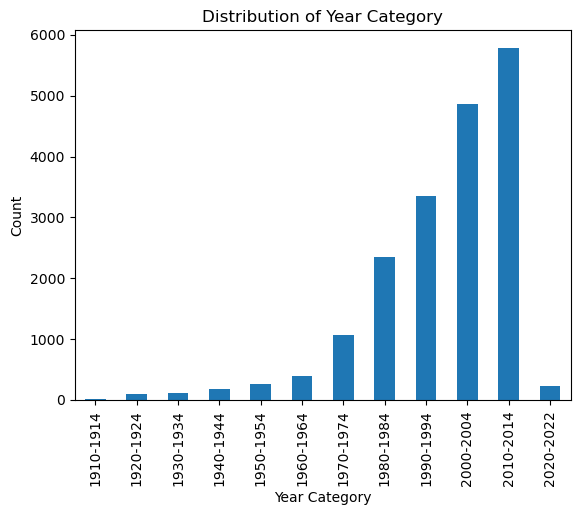

In [23]:
year_counts = new_df['year_category'].value_counts().sort_index()
year_counts.plot.bar()
plt.title('Distribution of Year Category')
plt.xlabel('Year Category')
plt.ylabel('Count')
plt.show()

In [24]:
X_train, X_test, y_train, y_test = train_test_split(new_df[['certificate', 'runtime', 'rating', 'votes', 'year_category',
                                                            'Action', 'Adventure', 'Crime', 'Family', 'Fantasy', 'Film-Noir',
                                                            'History', 'Horror', 'Mystery', 'Sci-Fi', 'Sport', 'Thriller', 'War']]
                                                    , new_df['gross(in $)'], test_size=0.2, random_state=42)

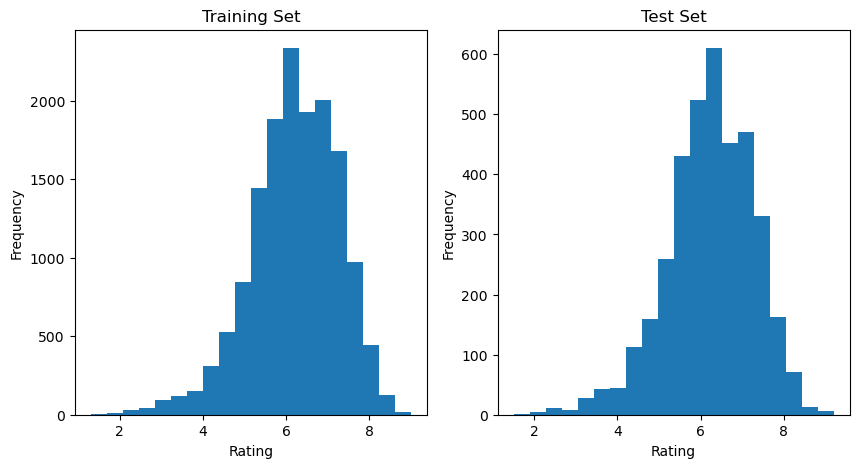

In [25]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
ax[0].hist(X_train['rating'], bins=20)
ax[0].set_title('Training Set')
ax[0].set_xlabel('Rating')
ax[0].set_ylabel('Frequency')
ax[1].hist(X_test['rating'], bins=20)
ax[1].set_title('Test Set')
ax[1].set_xlabel('Rating')
ax[1].set_ylabel('Frequency')
plt.show()

In [26]:
X_train_num = X_train[['runtime', 'rating', 'votes', 
                      'Action', 'Adventure', 'Crime', 'Family', 'Fantasy', 'Film-Noir',
                       'History', 'Horror', 'Mystery', 'Sci-Fi', 'Sport', 'Thriller', 'War']]
X_train_cat = X_train[['certificate', 'year_category']]

X_train_num_scaled = num_scaler.fit_transform(X_train_num)
X_train_cat_encoded = ohe_encoder.fit_transform(X_train_cat)

In [27]:
X_train_preprocessed = pd.concat([
    pd.DataFrame(X_train_num_scaled, columns=['runtime', 'rating', 'votes',
                                             'Action', 'Adventure', 'Crime', 'Family', 'Fantasy', 'Film-Noir', 
                                              'History', 'Horror', 'Mystery', 'Sci-Fi', 'Sport', 'Thriller', 'War']),
    pd.DataFrame(X_train_cat_encoded.toarray(), columns=ohe_encoder.get_feature_names(['certificate','year_category']))
], axis=1)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [28]:
X_test_num = X_test[['runtime', 'rating', 'votes', 
                     'Action', 'Adventure', 'Crime', 'Family', 'Fantasy', 'Film-Noir',
                     'History', 'Horror', 'Mystery', 'Sci-Fi', 'Sport', 'Thriller', 'War']]
X_test_cat = X_test[['certificate', 'year_category',]]

X_test_num_scaled = num_scaler.transform(X_test_num)
X_test_cat_encoded = ohe_encoder.transform(X_test_cat)

In [29]:
X_test_preprocessed = pd.concat([
    pd.DataFrame(X_test_num_scaled, columns=['runtime', 'rating', 'votes', 
                                             'Action', 'Adventure', 'Crime', 'Family', 'Fantasy', 
                                             'Film-Noir', 'History', 'Horror', 'Mystery', 'Sci-Fi', 'Sport', 'Thriller', 'War']),
    pd.DataFrame(X_test_cat_encoded.toarray(), columns=ohe_encoder.get_feature_names(['certificate', 'year_category']))
], axis=1)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


<font size="5">Linear Regression</font>

In [30]:
model = LinearRegression()
model.fit(X_train_preprocessed, y_train)
y_pred = model.predict(pd.concat([pd.DataFrame(X_test_num_scaled, columns=['runtime', 'rating', 'votes', 
                                                                           'Action', 'Adventure', 'Crime', 'Family', 'Fantasy', 'Film-Noir', 
                                                                           'History', 'Horror', 'Mystery', 'Sci-Fi', 'Sport', 'Thriller', 'War']), 
                                  pd.DataFrame(X_test_cat_encoded.toarray(), columns=ohe_encoder.get_feature_names(['certificate', 'year_category']))], axis=1))

print('R2 score:', r2_score(y_test, y_pred))
print('Mean squared error:', mean_squared_error(y_test, y_pred))
print('Mean absolute error:', mean_absolute_error(y_test, y_pred))

R2 score: 0.5089222604738586
Mean squared error: 2111159888783467.0
Mean absolute error: 25000758.703367185


/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


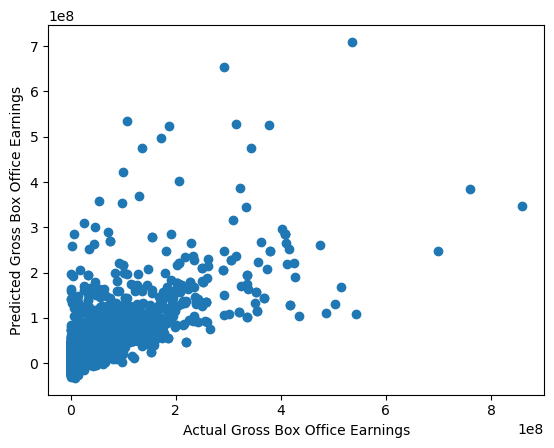

In [31]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Gross Box Office Earnings")
plt.ylabel("Predicted Gross Box Office Earnings")
plt.show()

<font size="5">Decision Tree</font>

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


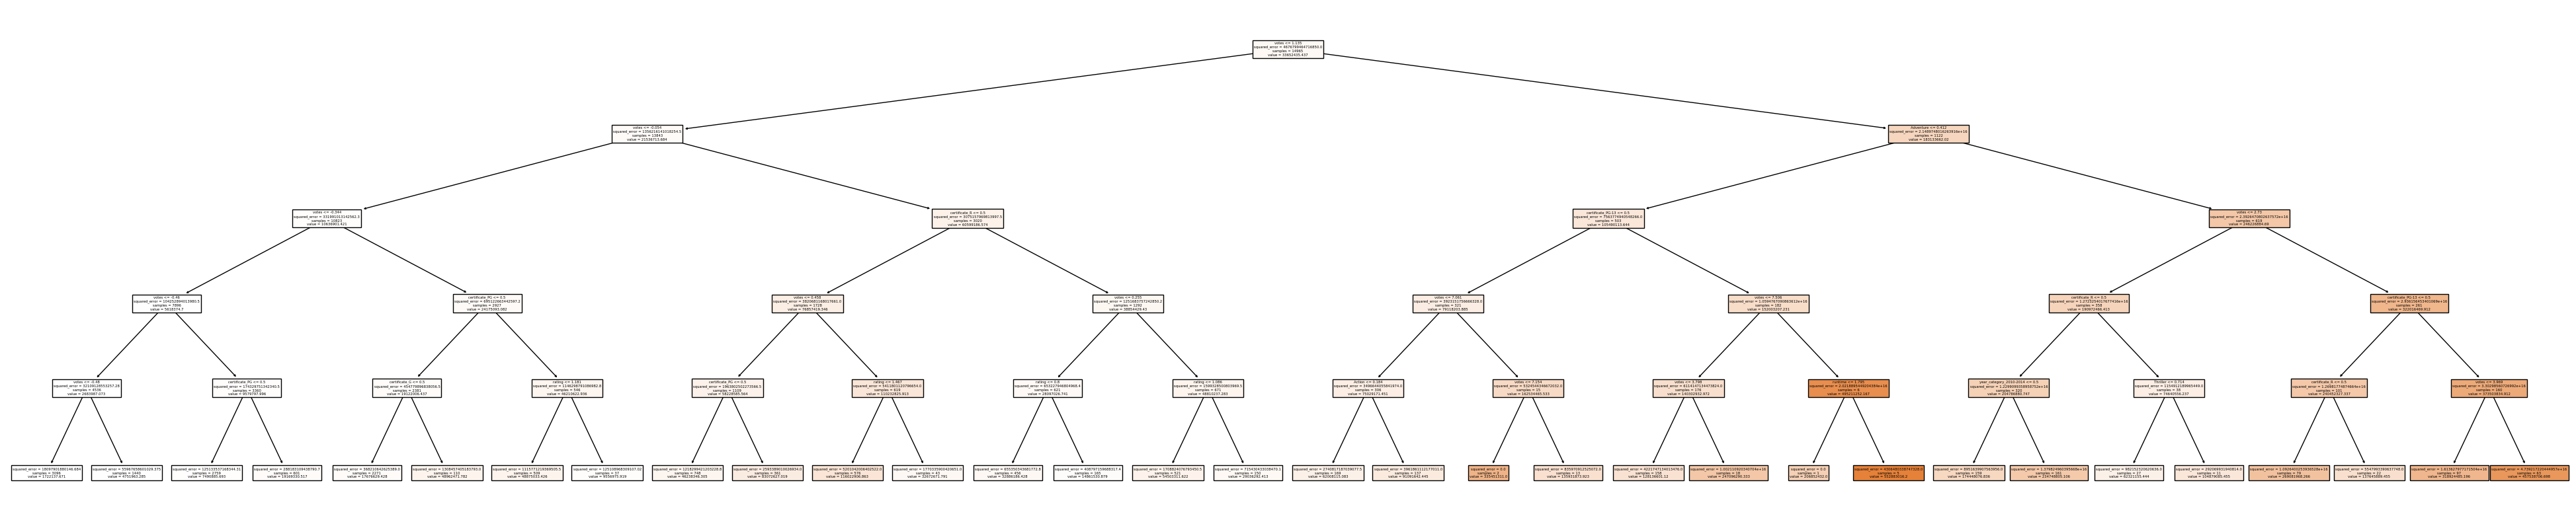

R2 score: 0.6835361100556148
Mean squared error: 1360489016145694.2
Mean absolute error: 18841488.99535284


In [32]:
model = DecisionTreeRegressor(max_depth=5)
model.fit(X_train_preprocessed, y_train)
y_pred= model.predict(pd.concat([pd.DataFrame(X_test_num_scaled, columns=['runtime', 'rating', 'votes', 
                                                                           'Action', 'Adventure', 'Crime', 'Family', 'Fantasy', 'Film-Noir', 
                                                                           'History', 'Horror', 'Mystery', 'Sci-Fi', 'Sport', 'Thriller', 'War']),
                                  pd.DataFrame(X_test_cat_encoded.toarray(), columns=ohe_encoder.get_feature_names(['certificate', 'year_category']))], axis=1))

feature_names = X_train_preprocessed.columns
plt.figure(figsize=(50, 10))
plot_tree(model, filled=True, feature_names=feature_names)
plt.show()

print('R2 score:', r2_score(y_test, y_pred))
print('Mean squared error:', mean_squared_error(y_test, y_pred))
print('Mean absolute error:', mean_absolute_error(y_test, y_pred))

<font size="5">SVR</font>

In [33]:
model = SVR(kernel='rbf', C=100, gamma='auto')
model.fit(X_train_preprocessed, y_train)
y_pred = model.predict(pd.concat([pd.DataFrame(X_test_num_scaled, columns=['runtime', 'rating', 'votes', 'Action', 'Adventure', 'Crime', 'Family', 'Fantasy', 'Film-Noir', 'History', 'Horror', 'Mystery', 'Sci-Fi', 'Sport', 'Thriller', 'War']), 
                                  pd.DataFrame(X_test_cat_encoded.toarray(), columns=ohe_encoder.get_feature_names(['certificate', 'year_category']))], axis=1))

print('R2 score:', r2_score(y_test, y_pred))
print('Mean squared error:', mean_squared_error(y_test, y_pred))
print('Mean absolute error:', mean_absolute_error(y_test, y_pred))

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


R2 score: -0.1616173348250547
Mean squared error: 4993832393552557.0
Mean absolute error: 32439049.536237974


<font size="5">Random Forest</font>

In [34]:
#If we OHE everything

# rf = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
# rf.fit(X_train_preprocessed, y_train)

# y_pred = rf.predict(X_test)
# mse = mean_squared_error(y_test, y_pred)
# print(mse)

<font size="5">XGBoost</font>

In [35]:
model = xgb.XGBRegressor()
model.fit(X_train_preprocessed, y_train)

y_pred = model.predict(X_test_preprocessed)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: ", rmse)

# accuracy = accuracy_score(y_test, y_pred)
# print("Accuracy:", accuracy)

Root Mean Squared Error:  17400282.43685287


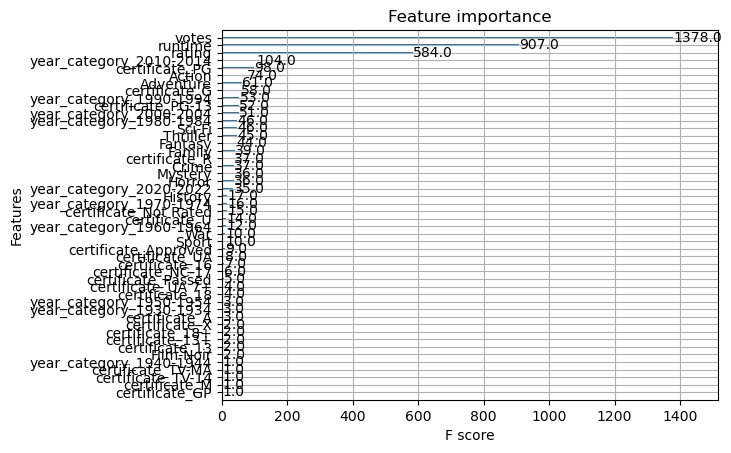

In [36]:
xgb.plot_importance(model)
plt.show()

<font size="5">XGBoost</font>

In [37]:
model = LogisticRegression()
model.fit(X_train_preprocessed, y_train)

y_pred = model.predict(X_test_preprocessed)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://urldefense.com/v3/__https://scikit-learn.org/stable/modules/preprocessing.html*5Cn__;JQ!!Mih3wA!G-UdNKuGR28PGoVdpMX-_gMcEnfv84eopdwBrzvZX61LI-5D90Z8GYnQ7kf-ATx3qKv5oSUpx57SrA$ Please also refer to the documentation for alternative solver options:
    https://urldefense.com/v3/__https://scikit-learn.org/stable/modules/linear_model.html*logistic-regression*5Cn__;IyU!!Mih3wA!G-UdNKuGR28PGoVdpMX-_gMcEnfv84eopdwBrzvZX61LI-5D90Z8GYnQ7kf-ATx3qKv5oSUowljR6w$   n_iter_i = _check_optimize_result(


Accuracy: 0.18359166221272047
